<h1>Creative AI<h1>


Creative Ai is a new branch of Artificial Intelligence in which AI can create paintings write  compelling stories, and compose new music 

<h1>What is Deep Dream?</h1>
<h2>Deep dream is a computer vision algorithm developed by Alex  Mordvintsev at Google.</h2>


1. Deep Dream is the most freaky, Creepy AI algorithm to date!
2. Ever wondered what does an AI see?(hidden Layer)

In [1]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import PIL.Image
import cv2
import random 
from PIL import Image 

2024-06-28 08:25:45.245702: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<h3>My  perpus of the project We are remember  when you were a kid looking at clouds and trying to interpret shapes? This is a horse, here's a dog.. <h3>

In [2]:
tf.__version__

'2.16.1'

In [3]:
pip install tf.keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
base_model = tf.keras.applications.InceptionV3(include_top = False, weights = 'imagenet')

In [5]:
# Open the first image
# Source: https://www.pxfuel.com/en/free-photo-xxgfs
img_1 = Image.open("mars.jpg")

# Open the second image
# Source: https://commons.wikimedia.org/wiki/File:Georges_Garen_embrasement_tour_Eiffel.jpg
img_2 = Image.open('eiffel.jpg')

# Blend the two images

image = Image.blend(img_1, img_2, 0.5) # alpha --> The interpolation alpha factor. If alpha is 0.0, a copy of the first image is returned.
# If alpha is 1.0, a copy of the second image is returned. 

# Save the blended image
image.save("img_0.jpg")

In [6]:
# Load the image
Sample_Image = tf.keras.preprocessing.image.load_img('img_0.jpg')

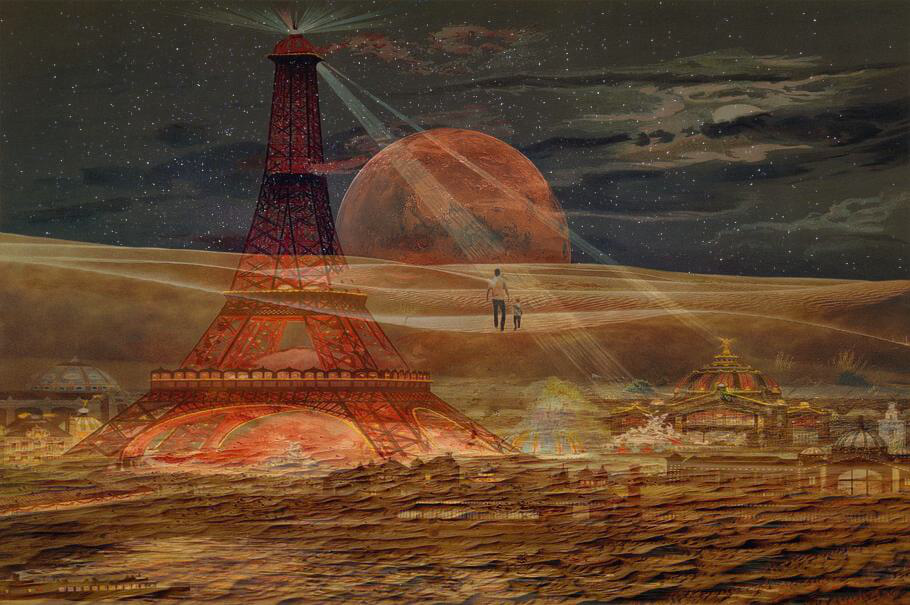

In [7]:
Sample_Image

In [8]:
# Get the shape of the image
np.shape(Sample_Image)

(605, 910, 3)

In [9]:
# Check out the type of the image
type(Sample_Image)

PIL.JpegImagePlugin.JpegImageFile

In [10]:
# Convert to numpy array
Sample_Image = tf.keras.preprocessing.image.img_to_array(Sample_Image)

# Sample_Image = np.array(Sample_Image)

In [11]:
# Confirm that the image is converted to Numpy array
type(Sample_Image)

numpy.ndarray

In [12]:
# Obtain the max and min values
print('min pixel values = {}, max pixel values = {}'.format(Sample_Image.min(), Sample_Image.max()))

min pixel values = 0.0, max pixel values = 255.0


In [13]:
# Normalize the input image
Sample_Image = np.array(Sample_Image)/255.0
Sample_Image.shape

(605, 910, 3)

In [14]:
# Let's verify normalized images values!
print('min pixel values = {}, max pixel values = {}'.format(Sample_Image.min(), Sample_Image.max()))

min pixel values = 0.0, max pixel values = 1.0


In [15]:
Sample_Image = tf.expand_dims(Sample_Image, axis = 0)

In [16]:
np.shape(Sample_Image)

TensorShape([1, 605, 910, 3])

<h5> Run The Pretrained Model and Explore Activations </h5>

 

1.Select a layer and attempt at maximizing the loss which is the activations generated by the layer of interest.
2. We can select any layer we choose, early layers generate simple features such as edges and deep layers generate more complex features such as entire face, car or tree.
3. Inception network has multiple concatenated layers named 'mixed' 

In [17]:
base_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, None,      │        864 │ input_layer[0][0] │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, None,      │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, None,      │      9,216 │ activation[0][0]  │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, None,      │     18,432 │ activation_1[0][… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, None,      │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, None,      │      5,120 │ max_pooling2d[0]… │
│                     │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, None,      │    138,240 │ activation_3[0][… │
│                     │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, None,      │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [18]:
 # Maximize the activations of these layers

names = ['mixed3', 'mixed5', 'mixed7']

# names = ['mixed3']

layers = [base_model.get_layer(name).output for name in names]

# Create the feature extraction model
deepdream_model = tf.keras.Model(inputs = base_model.input, outputs = layers)

In [19]:
deepdream_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, None,      │        864 │ input_layer[0][0] │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, None,      │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, None,      │      9,216 │ activation[0][0]  │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, None,      │     18,432 │ activation_1[0][… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, None,      │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, None,      │      5,120 │ max_pooling2d[0]… │
│                     │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, None,      │    138,240 │ activation_3[0][… │
│                     │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, None,      │          0 │ batch_normalizat

 Total params: 8,975,264 (34.24 MB)

 Trainable params: 8,956,448 (34.17 MB)

 Non-trainable params: 18,816 (73.50 KB)

In [20]:
# Let's run the model by feeding in our input image and taking a look at the activations "Neuron outputs"
activations = deepdream_model(Sample_Image)
activations

[<tf.Tensor: shape=(1, 36, 55, 768), dtype=float32, numpy=
 array([[[[0.        , 0.        , 0.        , ..., 0.        ,
           0.49032366, 0.30896991],
          [0.        , 0.08471388, 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.3008678 , 0.        , ..., 0.        ,
           0.03278732, 0.        ],
          ...,
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.38026714,
           0.07959986, 0.        ],
          [0.        , 0.        , 0.        , ..., 0.38026714,
           0.7159075 , 0.02941036]],
 
         [[0.6781936 , 0.        , 0.        , ..., 0.        ,
           0.34486902, 0.7119028 ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.32796913],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          ...,
        

In [21]:
len(activations)

3

<h6>UNDERSTAND HOW TO PERFORM GRADIENT CALCULATION AND  TF.GRADIENTTAPE<h6>

In [22]:
x = tf.constant(2.0)

In [23]:
with tf.GradientTape() as g:
  g.watch(x)
  y = x * x * x
dy_dx = g.gradient(y, x) # Will compute to 12

In [24]:
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

In [25]:
x = tf.constant(5.0)

In [26]:
with tf.GradientTape() as g:
  g.watch(x)
  y = (x * x * x * x) + (x * x * x * x * x)  
dy_dx = g.gradient(y, x) 
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=3625.0>

In [27]:
# Since the cal_closs function includes expand dimension, let's squeeze the image (reduce_dims)
Sample_Image.shape

TensorShape([1, 605, 910, 3])

In [28]:
Sample_Image = tf.squeeze(Sample_Image, axis = 0)

In [29]:
Sample_Image.shape


TensorShape([605, 910, 3])

In [30]:
def calc_loss(image, model):
# Function used for loss calculations
# It works by feedforwarding the input image through the network and generate activations
# Then obtain the average and sum of those outputs

  img_batch = tf.expand_dims(image, axis=0) # Convert into batch format
  layer_activations = model(img_batch) # Run the model
  print('ACTIVATION VALUES (LAYER OUTPUT) =\n', layer_activations)
  # print('ACTIVATION SHAPE =\n', np.shape(layer_activations))

  losses = [] # accumulator to hold all the losses
  for act in layer_activations:
    loss = tf.math.reduce_mean(act) # calculate mean of each activation 
    losses.append(loss)
  
  print('LOSSES (FROM MULTIPLE ACTIVATION LAYERS) = ', losses)
  print('LOSSES SHAPE (FROM MULTIPLE ACTIVATION LAYERS) = ', np.shape(losses))
  print('SUM OF ALL LOSSES (FROM ALL SELECTED LAYERS)= ', tf.reduce_sum(losses))

  return  tf.reduce_sum(losses) # Calculate sum 

In [31]:
loss = calc_loss(tf.Variable(Sample_Image), deepdream_model)

ACTIVATION VALUES (LAYER OUTPUT) =
 [<tf.Tensor: shape=(1, 36, 55, 768), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.49032366, 0.30896991],
         [0.        , 0.08471388, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.3008678 , 0.        , ..., 0.        ,
          0.03278732, 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.38026714,
          0.07959986, 0.        ],
         [0.        , 0.        , 0.        , ..., 0.38026714,
          0.7159075 , 0.02941036]],

        [[0.6781936 , 0.        , 0.        , ..., 0.        ,
          0.34486902, 0.7119028 ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.32796913],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
       

In [32]:
loss # Sum up the losses from both activations

<tf.Tensor: shape=(), dtype=float32, numpy=0.55779195>

In [33]:
# When you annotate a function with tf.function, the function can be called like any other python defined function. 
# The benefit is that it will be compiled into a graph so it will be much faster and could be executed over TPU/GPU

@tf.function
def deepdream(model, image, step_size):
    with tf.GradientTape() as tape:
      # This needs gradients relative to `img`
      # `GradientTape` only watches `tf.Variable`s by default
      tape.watch(image)
      loss = calc_loss(image, model) # call the function that calculate the loss 

    # Calculate the gradient of the loss with respect to the pixels of the input image.
    # The syntax is as follows: dy_dx = g.gradient(y, x) 
    gradients = tape.gradient(loss, image)

    print('GRADIENTS =\n', gradients)
    print('GRADIENTS SHAPE =\n', np.shape(gradients))

    # tf.math.reduce_std computes the standard deviation of elements across dimensions of a tensor
    gradients /= tf.math.reduce_std(gradients)  

    # In gradient ascent, the "loss" is maximized so that the input image increasingly "excites" the layers.
    # You can update the image by directly adding the gradients (because they're the same shape!)
    image = image + gradients * step_size
    image = tf.clip_by_value(image, -1, 1)

    return loss, image

In [34]:
def run_deep_dream_simple(model, image, steps = 100, step_size = 0.01):
  # Convert from uint8 to the range expected by the model.
  image = tf.keras.applications.inception_v3.preprocess_input(image)

  for step in range(steps):
    loss, image = deepdream(model, image, step_size)
    
    if step % 100 == 0:
      plt.figure(figsize=(12,12))
      plt.imshow(deprocess(image))
      plt.show()
      print ("Step {}, loss {}".format(step, loss))

  # clear_output(wait=True)
  plt.figure(figsize=(12,12))
  plt.imshow(deprocess(image))
  plt.show()

  return deprocess(image)

In [35]:
def deprocess(image):
  image = 255*(image + 1.0)/2.0
  return tf.cast(image, tf.uint8)


In [36]:
Sample_Image.shape

TensorShape([605, 910, 3])

In [37]:

# Let's Load the image again and convert it to Numpy array 
Sample_Image = np.array(tf.keras.preprocessing.image.load_img('img_0.jpg'))
dream_img = run_deep_dream_simple(model = deepdream_model, image = Sample_Image, steps = 4000, step_size = 0.001)


ACTIVATION VALUES (LAYER OUTPUT) =
 [<tf.Tensor 'functional_1_1/mixed3_1/concat:0' shape=(1, 36, 55, 768) dtype=float32>, <tf.Tensor 'functional_1_1/mixed5_1/concat:0' shape=(1, 36, 55, 768) dtype=float32>, <tf.Tensor 'functional_1_1/mixed7_1/concat:0' shape=(1, 36, 55, 768) dtype=float32>]
LOSSES (FROM MULTIPLE ACTIVATION LAYERS) =  [<tf.Tensor 'Mean:0' shape=() dtype=float32>, <tf.Tensor 'Mean_1:0' shape=() dtype=float32>, <tf.Tensor 'Mean_2:0' shape=() dtype=float32>]


NotImplementedError: in user code:

    File "/var/folders/bc/d5f5s66n15j8t8qp5slxsqdc0000gn/T/ipykernel_1169/1743234281.py", line 10, in deepdream  *
        loss = calc_loss(image, model) # call the function that calculate the loss
    File "/var/folders/bc/d5f5s66n15j8t8qp5slxsqdc0000gn/T/ipykernel_1169/3014354395.py", line 17, in calc_loss  *
        print('LOSSES SHAPE (FROM MULTIPLE ACTIVATION LAYERS) = ', np.shape(losses))
    File "/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py", line 2024, in shape  **
        result = asarray(a).shape

    NotImplementedError: Cannot convert a symbolic tf.Tensor (Mean:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported.


In [ ]:
image = tf.keras.preprocessing.image.load_img("img_0.jpg")

In [ ]:
plt.imshow(image)

In [ ]:
# Name of the folder
dream_name = 'mars_eiffel'

In [ ]:
# Blended image dimension

x_size = 910 # larger the image longer is going to take to fetch the frames 
y_size = 605

In [ ]:
# Define Counters 
created_count = 0
max_count = 50

In [44]:
# Unzip the folder

from zipfile import ZipFile
file_name = "mars_eiffel.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [45]:
# Path of all the frames

dream_path = 'mars_eiffel'

In [51]:
# Define the codec and create VideoWriter object 
# Download FFmeg 

fourcc = cv2.VideoWriter_fourcc(*'XVID') # FourCC is a 4-byte code used to specify the video codec

out = cv2.VideoWriter('deepdreamvideo.mp4', fourcc , 5.0, (910, 605)) # Specify the fourCC, frames per second (fps),
                                                                            # and frame size
# The frames per second value is depends on few important things
# 1. The number of frames we have created. Less number of frames brings small fps
# 2. The larger the image the bigger the fps value. For example, 1080 pixel image can bring 60 fps 

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [52]:
for i in range(9999999999999):
    
    # Get into the dream directory and looks for the number of images and then figure out what is the latest image. Hence with 
    # this image we are going to start with and let it dream on and on
    if os.path.isfile('mars_eiffel/img_{}.jpg'.format(i+1)):
        pass
    # Figure out how long the dream is 
    else:
        dream_length = i
        break

In [53]:
dream_length

200

In [54]:
for i in range(dream_length):
    
    # Build the frames of cv2.VideoWriter
    img_path = os.path.join(dream_path,'img_{}.jpg'.format(i)) # join the dream path
    
    print(img_path) # print the image path 
    
    frame = cv2.imread(img_path)
    out.write(frame)

out.release()

mars_eiffel/img_0.jpg
mars_eiffel/img_1.jpg
mars_eiffel/img_2.jpg
mars_eiffel/img_3.jpg
mars_eiffel/img_4.jpg
mars_eiffel/img_5.jpg
mars_eiffel/img_6.jpg
mars_eiffel/img_7.jpg
mars_eiffel/img_8.jpg
mars_eiffel/img_9.jpg
mars_eiffel/img_10.jpg
mars_eiffel/img_11.jpg
mars_eiffel/img_12.jpg
mars_eiffel/img_13.jpg
mars_eiffel/img_14.jpg
mars_eiffel/img_15.jpg
mars_eiffel/img_16.jpg
mars_eiffel/img_17.jpg
mars_eiffel/img_18.jpg
mars_eiffel/img_19.jpg
mars_eiffel/img_20.jpg
mars_eiffel/img_21.jpg
mars_eiffel/img_22.jpg
mars_eiffel/img_23.jpg
mars_eiffel/img_24.jpg
mars_eiffel/img_25.jpg
mars_eiffel/img_26.jpg
mars_eiffel/img_27.jpg
mars_eiffel/img_28.jpg
mars_eiffel/img_29.jpg
mars_eiffel/img_30.jpg
mars_eiffel/img_31.jpg
mars_eiffel/img_32.jpg
mars_eiffel/img_33.jpg
mars_eiffel/img_34.jpg
mars_eiffel/img_35.jpg
mars_eiffel/img_36.jpg
mars_eiffel/img_37.jpg
mars_eiffel/img_38.jpg
mars_eiffel/img_39.jpg
mars_eiffel/img_40.jpg
mars_eiffel/img_41.jpg
mars_eiffel/img_42.jpg
mars_eiffel/img_43.jp